# Data Preprocessing

### Importing packages


In [208]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing dataset

In [209]:
data = pd.read_csv('E:/sai/UCE/Learn_AI/Datasets/data.csv', header = 0)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [210]:
data.shape

(205, 26)

## Univariate analysis and EDD (Extended Data Dictionary)

#### What should be observed:
    1. Observe the EDD of every variable.
    2. If any doubt about the distribution of variables, Plot the histogram. If the variables are categorical then Plot with bar chart. 
    
    At last summarize the observations. 

In [211]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

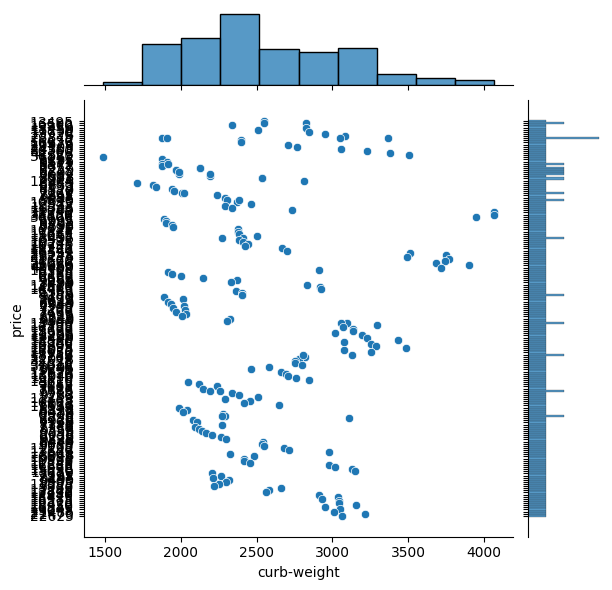

In [213]:
sns.jointplot(x="curb-weight", y="price", data=data)

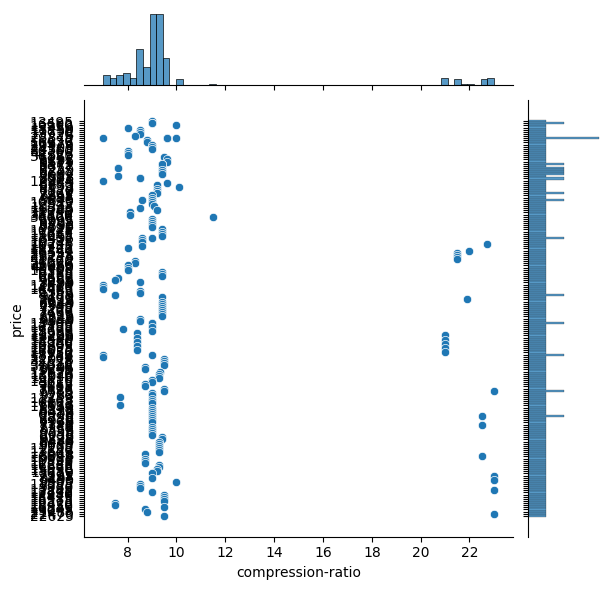

In [214]:
sns.jointplot(x="compression-ratio", y="price", data=data)

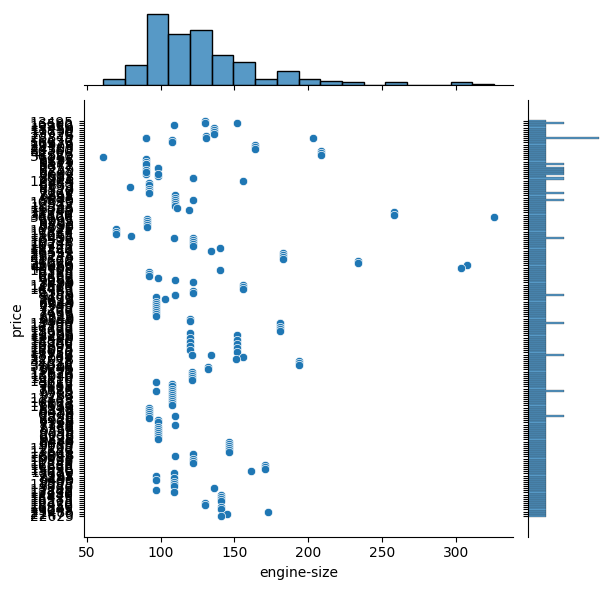

In [215]:
sns.jointplot(x="engine-size", y="price", data=data)

<Axes: xlabel='fuel-type', ylabel='count'>

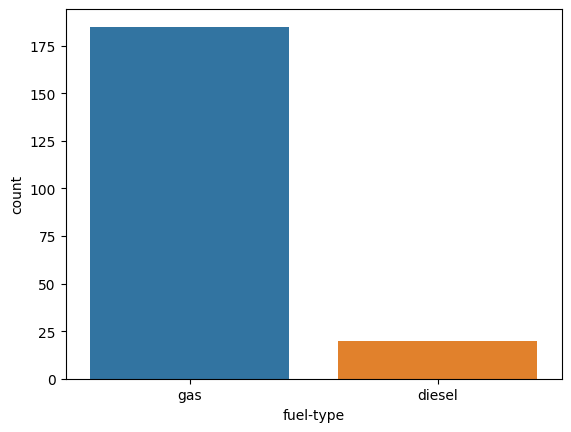

In [216]:
sns.countplot(x="fuel-type",data=data)

<Axes: xlabel='engine-location', ylabel='count'>

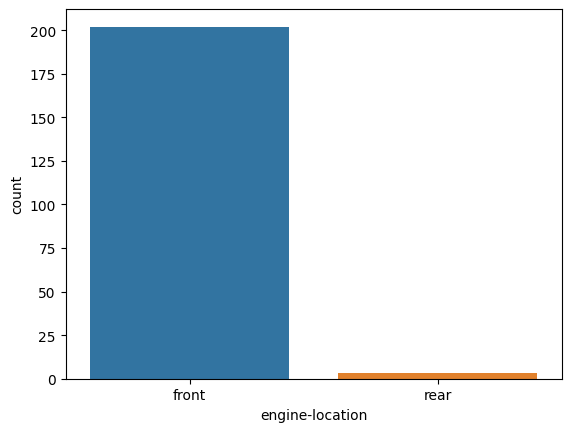

In [217]:
sns.countplot(x="engine-location",data=data)

#### Observation
    Skewness in curb-wieght, compression-ratio and engine-size
    Outliers in compression-ratio and engine-size
    Most of the engine-location values are 'front'

#### What can be extracted from Univariate analysis and EDD
    Missing values
    Skewness of the data
    Outliers
    Uneffected variables
    Nan values

## Outlier Treatment

    Outliers are the values far from the overall pattern sample

    Solution
        Detect the outliers by using the box plot, scatter plot and EDD
        Impute the Outliers

    Methods
        1.Capping and Flooring
        • Impute all the values above 3* P99 and below 0.3*P1
        • Impute with values 3* P99 and 0.3*PI
        • You can use any multiplier instead of 3, as per your business
        requirement
        2.Exponential smoothing
        • Extrapolate curve between P95 to P99 and cap all the values falling outside to the value generated by the curve
        • Similarly, extrapolate curve between P5 and PI
        3.sigma approach
        •  Identify outliers by capturing all the values falling outside mu + x * sd
        • You can use any multiplier as x, as per your business requirement

In [218]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [219]:
np.percentile(data["engine-size"],[99])

array([302.16])

In [220]:
np.percentile(data["engine-size"],[99])[0]

302.16000000000037

In [221]:
up = np.percentile(data['engine-size'],[99])[0]
up

302.16000000000037

In [222]:
eng_size = data["engine-size"]

In [223]:
data[data["engine-size"]>up]["engine-size"]

49    326
73    308
74    304
Name: engine-size, dtype: int64

In [224]:
data["engine-size"][data['engine-size']>up*3] = up*3
up*3

C:\Users\sainithin\AppData\Local\Temp\ipykernel_8276\1475096874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine-size"][data['engine-size']>up*3] = up*3


906.4800000000012

In [225]:
data[data["engine-size"]>up]["engine-size"]

49    326
73    308
74    304
Name: engine-size, dtype: int64

In [226]:
lp = np.percentile(data["symboling"],[1])[0]
lp

-1.96

In [227]:
data[data["symboling"]< lp]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420


In [228]:
data[data["symboling"]<lp*0.3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
71,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,34184
88,-1,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


In [229]:
data["symboling"][data["symboling"]<lp*0.3] = lp*0.3
data[data["symboling"]==lp*0.3]

C:\Users\sainithin\AppData\Local\Temp\ipykernel_8276\1756273068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["symboling"][data["symboling"]<lp*0.3] = lp*0.3


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,-0.588,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
67,-0.588,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-0.588,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
70,-0.588,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
71,-0.588,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,34184
88,-0.588,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
123,-0.588,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
173,-0.588,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-0.588,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
175,-0.588,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


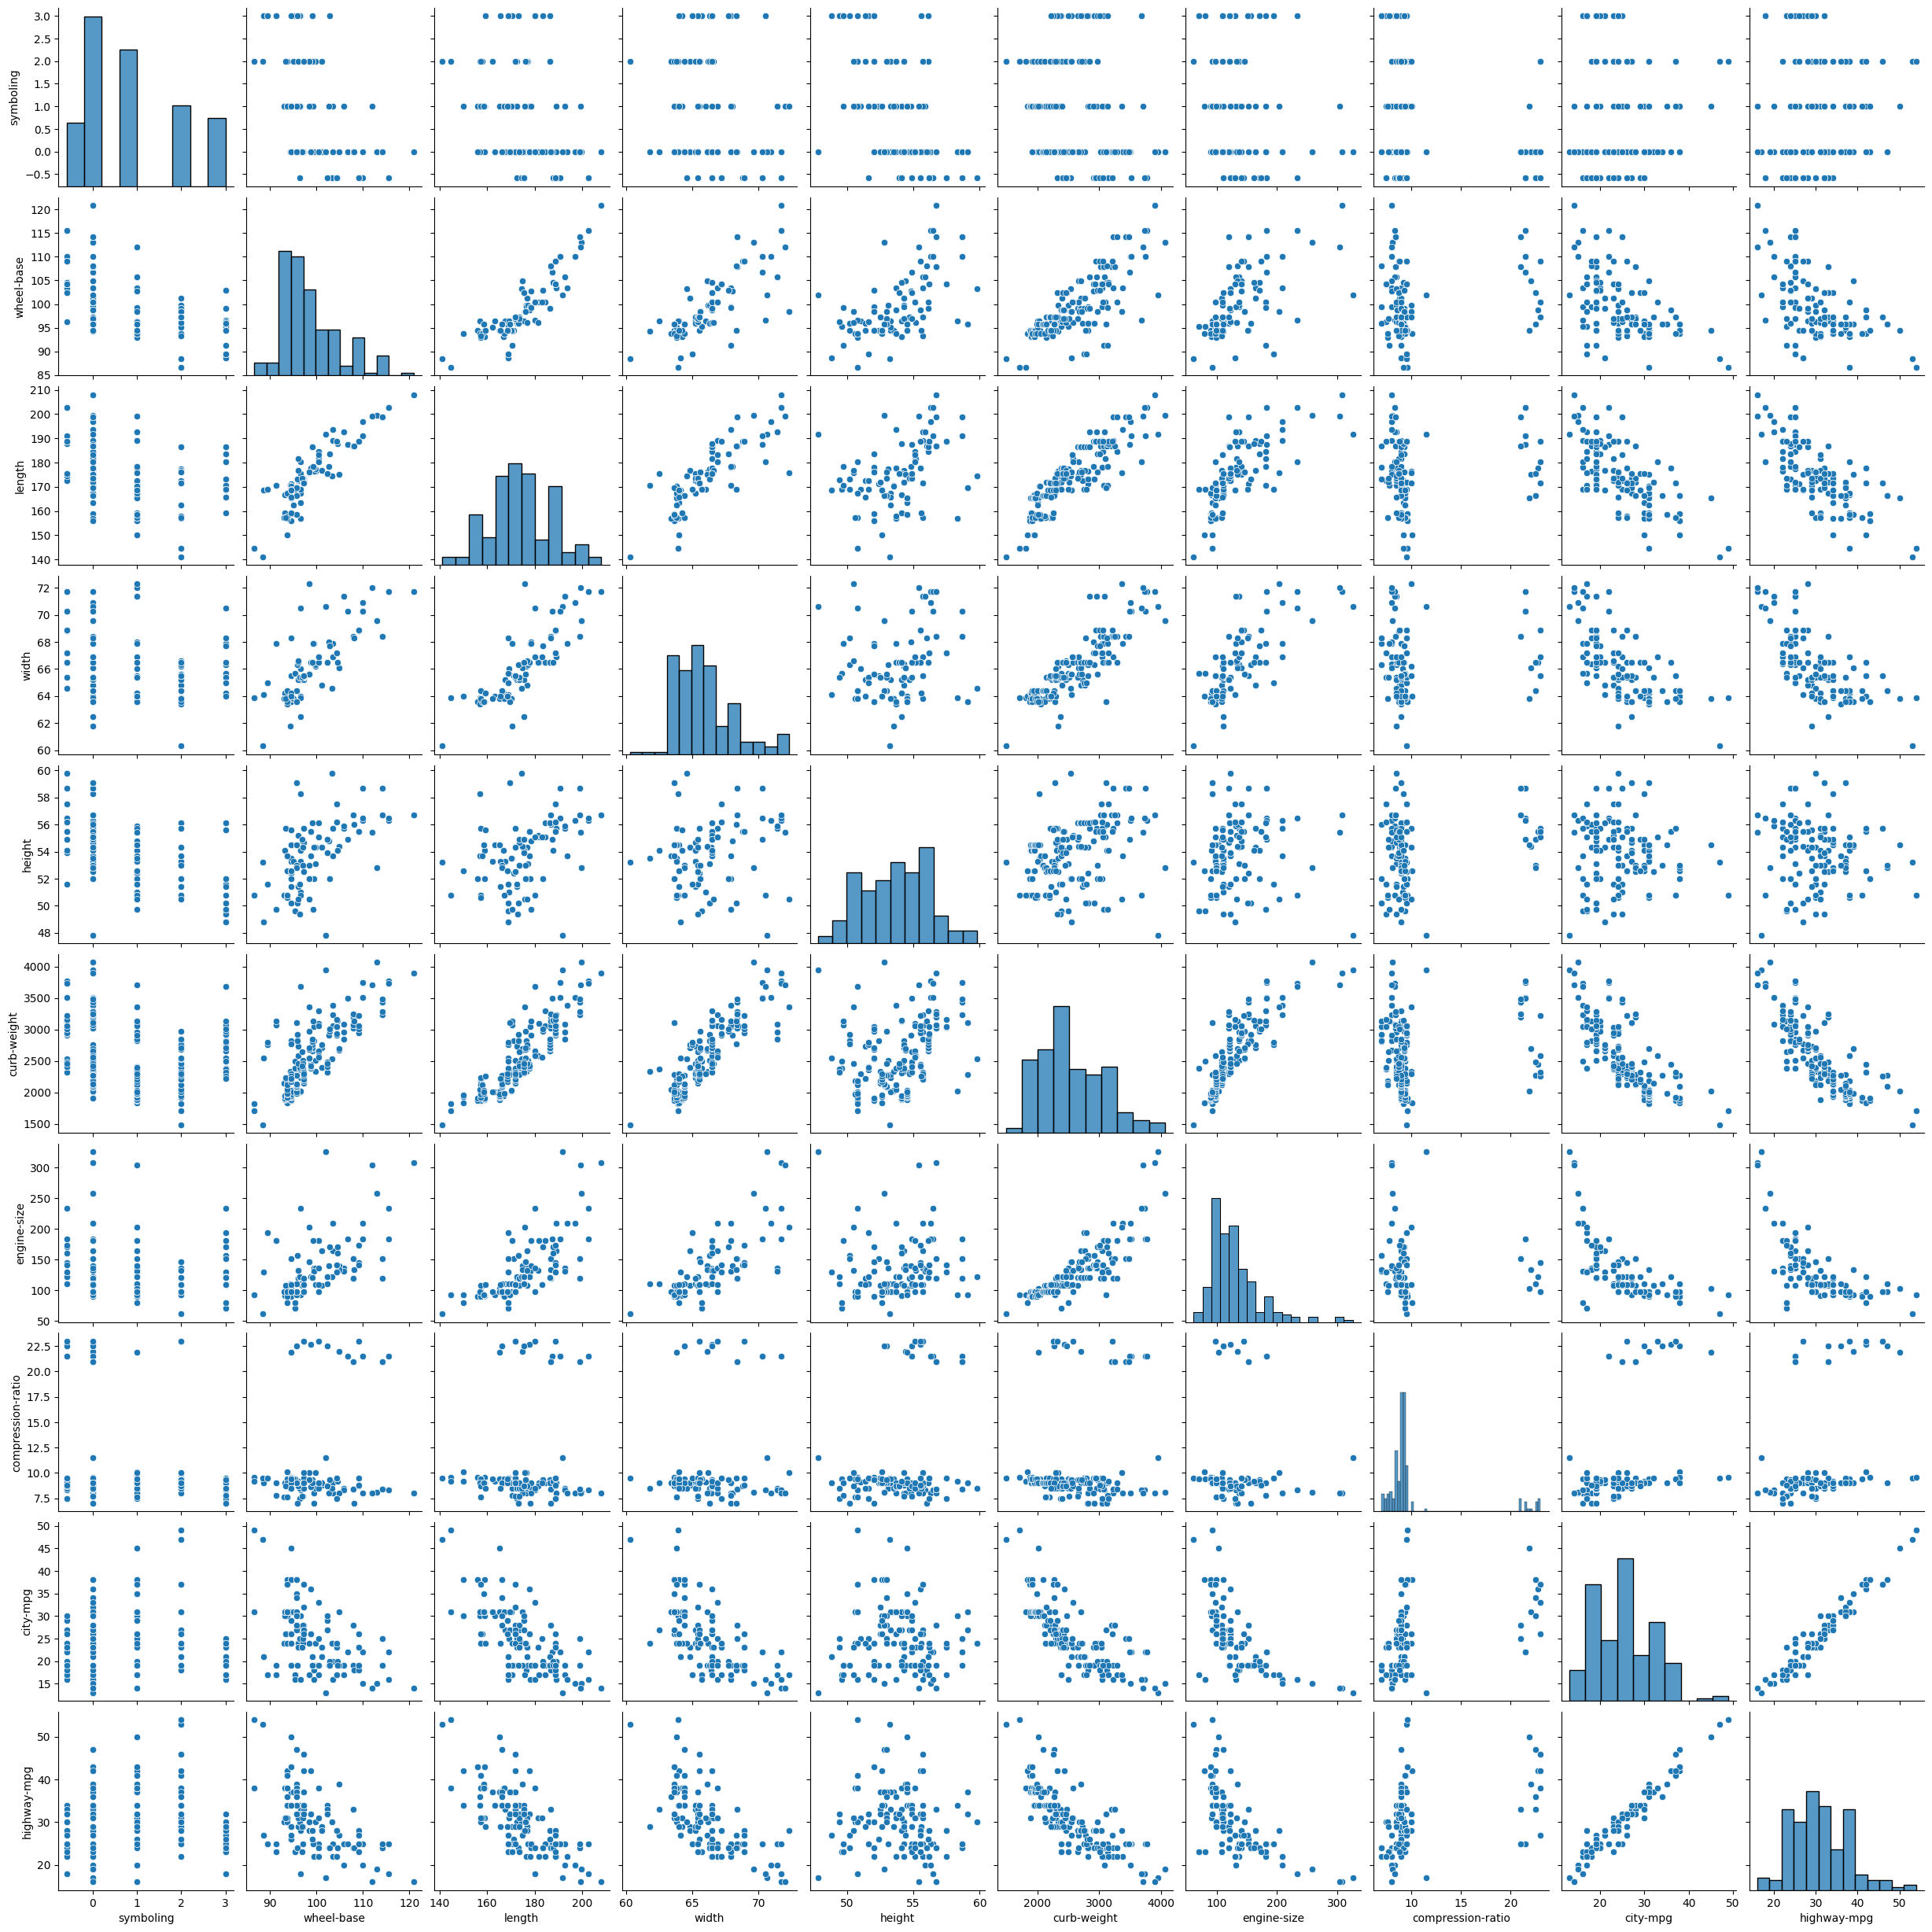

In [230]:
sns.pairplot(data)